# RNN

## Fungsi dan Variabel

In [24]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import numpy as np
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from Datasets.nusax_indonesia import NusaxIndonesiaDataset
from Models.SimpleRNN.SimpleRNN import SimpleRNNModel
from Models.SimpleRNN.training.configs import (
    VARIASI_LAYER_RNN, VARIASI_CELL_RNN, 
    VARIASI_ARAH_RNN, EMBEDDING_DIM
)

SAVE_PATH = "Models/SimpleRNN/training"

In [25]:
def plot_loss_curves(history, title):
    plt.plot(history.history["loss"], label = "Train Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

In [26]:
def train_and_evaluate_all(variation_dict, variation_name, dataset_dict):
    print(f"\n\n=== {variation_name} Variations ===\n")
    
    for name, config in variation_dict.items():
        print(f"\n--- Training: {name} ---")
        
        model = SimpleRNNModel(
            vocab_size=len(dataset_dict['vocab']),
            embedding_dim=EMBEDDING_DIM,
            rnn_unit=config['rnn_unit'],
            num_classes=3,
            sequence_length=dataset_dict['x_train'].shape[1],
            bidirectional=config['bidirectional'],
            w_dir=f"{SAVE_PATH}/weights/{variation_name}"
        )
        
        model.build_model()
        
        history = model.train(
            dataset_dict['x_train'], dataset_dict['y_train'],
            dataset_dict['x_val'], dataset_dict['y_val'],
            epochs=config['n_epochs']
        )
        
        model.evaluate(dataset_dict['x_test'], dataset_dict['y_test'])
        
        filename = f"{name}.weights.h5"
        model.save_weights(filename)
        
        print(f"{name} | Macro F1 Score: {model.f1_macro:.4f}")
        plot_loss_curves(history, f"{name} | Training & Validation Loss")

## Load Dataset

In [27]:
dataset = NusaxIndonesiaDataset()
dataset_dict = dataset.get_data()

print(f"\nStatistik:")
print(f"Vocab Size: {len(dataset_dict['vocab'])}")
print(f"Panjang Sekuens: {dataset_dict['x_train'].shape[1]}")
print(f"\nUkuran Data:")
print(f"Train: {dataset_dict['x_train'].shape}")
print(f"Validation: {dataset_dict['x_val'].shape}")
print(f"Test: {dataset_dict['x_test'].shape}")

1. Memuat Data
Jumlah data train: 500
Jumlah data validasi: 100
Jumlah data test: 400

2. Label Encoding

3. Vektorisasi

4. Tokenisasi data teks

Statistik:
Vocab Size: 2836
Panjang Sekuens: 250

Ukuran Data:
Train: (500, 250)
Validation: (100, 250)
Test: (400, 250)


In [28]:
dataset.print_sample_data(num_samples=2)


=== Contoh Hasil Tokenisasi ===

Teks Asli (Train Set index 0):
Nikmati cicilan 0% hingga 12 bulan untuk pemesanan tiket pesawat air asia dengan kartu kredit bni!
Teks Tokenized (Train Set index 0):
[1758, 1080, 1145, 196, 2834, 198, 11, 607, 177, 847, 283, 547, 7, 507, 496, 415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Label Asli: neut

## Training

### Variasi Jumlah Layer RNN



=== JumlahLayer Variations ===


--- Training: 1Layer_128unit_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396,291 (1.51 MB)

 Trainable params: 396,291 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 1s - 348ms/step - accuracy: 0.3200 - loss: 1.1125 - val_accuracy: 0.3800 - val_loss: 1.1003
Epoch 2/10
4/4 - 1s - 130ms/step - accuracy: 0.3900 - loss: 1.0962 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 3/10
4/4 - 0s - 120ms/step - accuracy: 0.4600 - loss: 1.0555 - val_accuracy: 0.4100 - val_loss: 1.0712
Epoch 4/10
4/4 - 0s - 123ms/step - accuracy: 0.4800 - loss: 1.0463 - val_accuracy: 0.3900 - val_loss: 1.0574
Epoch 5/10
4/4 - 0s - 116ms/step - accuracy: 0.5320 - loss: 0.9990 - val_accuracy: 0.4500 - val_loss: 1.0351
Epoch 6/10
4/4 - 0s - 118ms/step - accuracy: 0.5080 - loss: 0.9873 - val_accuracy: 0.3900 - val_loss: 1.0552
Epoch 7/10
4/4 - 0s - 123ms/step - accuracy: 0.5700 - loss: 0.9307 - val_accuracy: 0.4100 - val_loss: 1.0615
Epoch 8/10
4/4 - 0s - 120ms/step - accuracy: 0.5940 - loss: 0.9044 - val_accuracy: 0.4600 - val_loss: 1.0199
Epoch 9/10
4/4 - 0s - 117ms/step - accuracy: 0.6120 - loss: 0.8742 - val_accuracy: 0.4000 - val_loss: 1.0881
Epoch 10/10
4/4 - 0

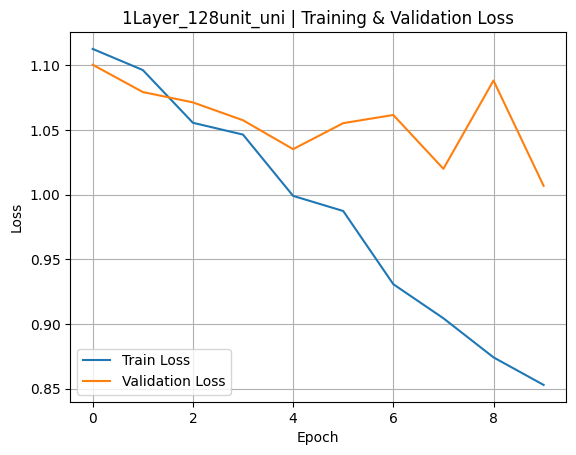


--- Training: 2Layer_128unit_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,187 (1.64 MB)

 Trainable params: 429,187 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 2s - 563ms/step - accuracy: 0.3660 - loss: 1.1532 - val_accuracy: 0.3800 - val_loss: 1.0829
Epoch 2/10
4/4 - 1s - 203ms/step - accuracy: 0.3680 - loss: 1.1086 - val_accuracy: 0.3800 - val_loss: 1.0839
Epoch 3/10
4/4 - 1s - 204ms/step - accuracy: 0.3600 - loss: 1.1093 - val_accuracy: 0.3800 - val_loss: 1.0803
Epoch 4/10
4/4 - 1s - 204ms/step - accuracy: 0.3980 - loss: 1.1045 - val_accuracy: 0.3800 - val_loss: 1.0796
Epoch 5/10
4/4 - 1s - 204ms/step - accuracy: 0.3740 - loss: 1.0918 - val_accuracy: 0.3800 - val_loss: 1.0795
Epoch 6/10
4/4 - 1s - 213ms/step - accuracy: 0.3620 - loss: 1.0989 - val_accuracy: 0.3800 - val_loss: 1.0796
Epoch 7/10
4/4 - 1s - 205ms/step - accuracy: 0.4040 - loss: 1.0815 - val_accuracy: 0.3800 - val_loss: 1.0799
Epoch 8/10
4/4 - 1s - 198ms/step - accuracy: 0.3440 - loss: 1.1004 - val_accuracy: 0.4500 - val_loss: 1.0781
Epoch 9/10
4/4 - 1s - 201ms/step - accuracy: 0.3800 - loss: 1.0890 - val_accuracy: 0.3800 - val_loss: 1.0811
Epoch 10/10
4/4 - 1

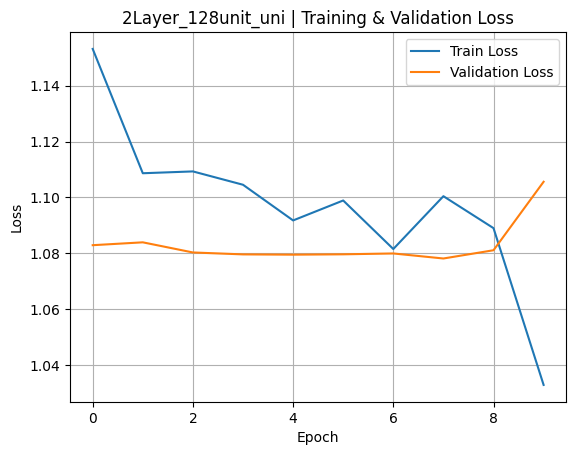


--- Training: 3Layer_128unit_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_3 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,083 (1.76 MB)

 Trainable params: 462,083 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 3s - 833ms/step - accuracy: 0.3800 - loss: 1.1390 - val_accuracy: 0.3800 - val_loss: 1.0828
Epoch 2/10
4/4 - 1s - 277ms/step - accuracy: 0.3600 - loss: 1.1136 - val_accuracy: 0.3800 - val_loss: 1.0796
Epoch 3/10
4/4 - 1s - 276ms/step - accuracy: 0.3900 - loss: 1.1220 - val_accuracy: 0.3900 - val_loss: 1.0815
Epoch 4/10
4/4 - 1s - 275ms/step - accuracy: 0.4200 - loss: 1.0829 - val_accuracy: 0.4500 - val_loss: 1.0728
Epoch 5/10
4/4 - 1s - 284ms/step - accuracy: 0.4740 - loss: 1.0094 - val_accuracy: 0.4200 - val_loss: 1.0615
Epoch 6/10
4/4 - 1s - 292ms/step - accuracy: 0.5120 - loss: 0.9543 - val_accuracy: 0.4400 - val_loss: 1.1063
Epoch 7/10
4/4 - 1s - 312ms/step - accuracy: 0.5980 - loss: 0.8667 - val_accuracy: 0.4400 - val_loss: 1.1061
Epoch 8/10
4/4 - 1s - 263ms/step - accuracy: 0.6540 - loss: 0.8030 - val_accuracy: 0.3900 - val_loss: 1.1238
Epoch 9/10
4/4 - 1s - 299ms/step - accuracy: 0.7020 - loss: 0.7343 - val_accuracy: 0.4500 - val_loss: 1.1577
Epoch 10/10
4/4 - 1

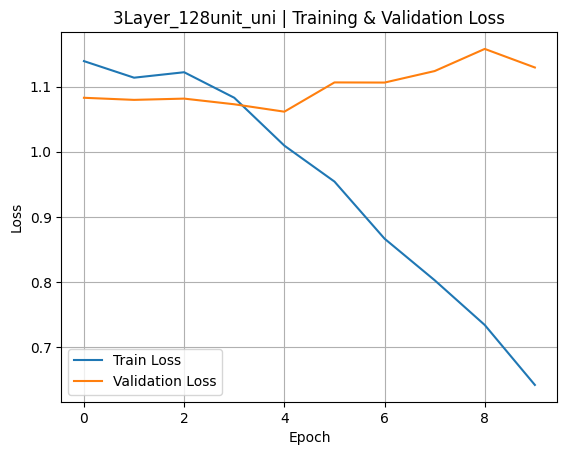

In [29]:
train_and_evaluate_all(VARIASI_LAYER_RNN, "JumlahLayer", dataset_dict)

### Variasi Banyak Cell



=== BanyakCell Variations ===


--- Training: 2Layer_64cell_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383,811 (1.46 MB)

 Trainable params: 383,811 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 2s - 466ms/step - accuracy: 0.3500 - loss: 1.1703 - val_accuracy: 0.3800 - val_loss: 1.1210
Epoch 2/10
4/4 - 0s - 114ms/step - accuracy: 0.3660 - loss: 1.1163 - val_accuracy: 0.3800 - val_loss: 1.0935
Epoch 3/10
4/4 - 0s - 114ms/step - accuracy: 0.3860 - loss: 1.0985 - val_accuracy: 0.4000 - val_loss: 1.0855
Epoch 4/10
4/4 - 0s - 107ms/step - accuracy: 0.3780 - loss: 1.0970 - val_accuracy: 0.3800 - val_loss: 1.0811
Epoch 5/10
4/4 - 0s - 115ms/step - accuracy: 0.3740 - loss: 1.1018 - val_accuracy: 0.4700 - val_loss: 1.0751
Epoch 6/10
4/4 - 0s - 105ms/step - accuracy: 0.4480 - loss: 1.0647 - val_accuracy: 0.3800 - val_loss: 1.0724
Epoch 7/10
4/4 - 0s - 103ms/step - accuracy: 0.4980 - loss: 1.0255 - val_accuracy: 0.3600 - val_loss: 1.0890
Epoch 8/10
4/4 - 0s - 109ms/step - accuracy: 0.5440 - loss: 0.9639 - val_accuracy: 0.3400 - val_loss: 1.0991
Epoch 9/10
4/4 - 0s - 101ms/step - accuracy: 0.5700 - loss: 0.9175 - val_accuracy: 0.3400 - val_loss: 1.0911
Epoch 10/10
4/4 - 0

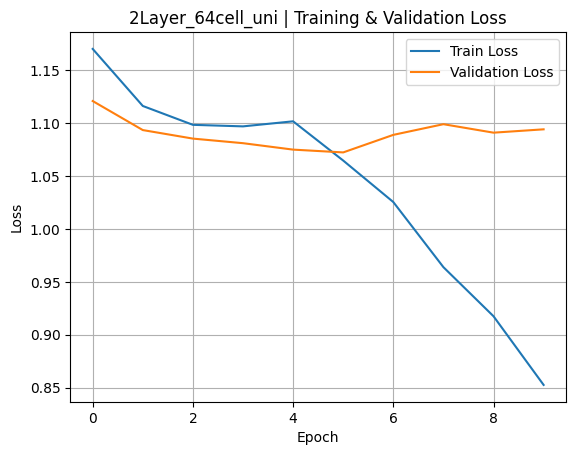


--- Training: 2Layer_128cell_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,187 (1.64 MB)

 Trainable params: 429,187 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 2s - 557ms/step - accuracy: 0.3720 - loss: 1.0986 - val_accuracy: 0.4400 - val_loss: 1.0796
Epoch 2/10
4/4 - 1s - 199ms/step - accuracy: 0.3840 - loss: 1.0922 - val_accuracy: 0.4500 - val_loss: 1.0677
Epoch 3/10
4/4 - 1s - 202ms/step - accuracy: 0.4040 - loss: 1.0672 - val_accuracy: 0.4900 - val_loss: 1.0349
Epoch 4/10
4/4 - 1s - 196ms/step - accuracy: 0.4780 - loss: 1.0247 - val_accuracy: 0.4500 - val_loss: 1.0059
Epoch 5/10
4/4 - 1s - 203ms/step - accuracy: 0.4900 - loss: 0.9970 - val_accuracy: 0.4800 - val_loss: 0.9794
Epoch 6/10
4/4 - 1s - 195ms/step - accuracy: 0.5140 - loss: 0.9603 - val_accuracy: 0.5000 - val_loss: 0.9629
Epoch 7/10
4/4 - 1s - 216ms/step - accuracy: 0.5760 - loss: 0.9095 - val_accuracy: 0.5300 - val_loss: 0.9599
Epoch 8/10
4/4 - 1s - 205ms/step - accuracy: 0.6140 - loss: 0.8679 - val_accuracy: 0.5600 - val_loss: 0.9407
Epoch 9/10
4/4 - 1s - 190ms/step - accuracy: 0.6800 - loss: 0.8032 - val_accuracy: 0.5600 - val_loss: 0.9418
Epoch 10/10
4/4 - 1

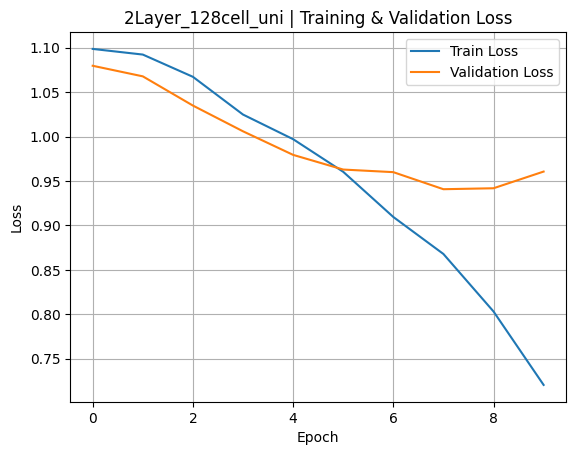


--- Training: 2Layer_256cell_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 593,667 (2.26 MB)

 Trainable params: 593,667 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 3s - 752ms/step - accuracy: 0.3860 - loss: 1.1082 - val_accuracy: 0.4200 - val_loss: 1.0708
Epoch 2/10
4/4 - 1s - 299ms/step - accuracy: 0.4180 - loss: 1.0553 - val_accuracy: 0.3100 - val_loss: 1.1318
Epoch 3/10
4/4 - 1s - 307ms/step - accuracy: 0.4780 - loss: 1.0127 - val_accuracy: 0.4500 - val_loss: 1.0091
Epoch 4/10
4/4 - 1s - 296ms/step - accuracy: 0.5060 - loss: 0.9558 - val_accuracy: 0.4400 - val_loss: 1.0353
Epoch 5/10
4/4 - 1s - 293ms/step - accuracy: 0.5380 - loss: 0.9208 - val_accuracy: 0.5100 - val_loss: 1.0391
Epoch 6/10
4/4 - 1s - 320ms/step - accuracy: 0.5740 - loss: 0.8799 - val_accuracy: 0.4100 - val_loss: 1.0890
Epoch 7/10
4/4 - 1s - 332ms/step - accuracy: 0.6700 - loss: 0.8027 - val_accuracy: 0.3400 - val_loss: 1.1144
Epoch 8/10
4/4 - 1s - 308ms/step - accuracy: 0.7160 - loss: 0.7463 - val_accuracy: 0.4000 - val_loss: 1.1230
Epoch 9/10
4/4 - 1s - 326ms/step - accuracy: 0.7520 - loss: 0.6346 - val_accuracy: 0.3400 - val_loss: 1.2444
Epoch 10/10
4/4 - 1

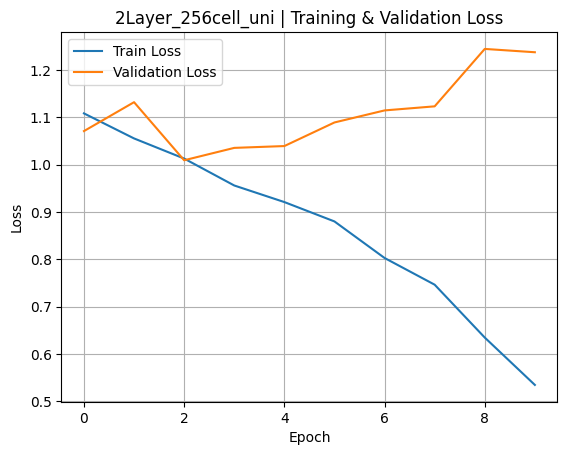

In [30]:
train_and_evaluate_all(VARIASI_CELL_RNN, "BanyakCell", dataset_dict)

### Variasi Arah



=== Arah Variations ===


--- Training: 2Layer_128cell_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,187 (1.64 MB)

 Trainable params: 429,187 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 2s - 548ms/step - accuracy: 0.3580 - loss: 1.1071 - val_accuracy: 0.3800 - val_loss: 1.0793
Epoch 2/10
4/4 - 1s - 220ms/step - accuracy: 0.3580 - loss: 1.1028 - val_accuracy: 0.3800 - val_loss: 1.0822
Epoch 3/10
4/4 - 1s - 198ms/step - accuracy: 0.3900 - loss: 1.0878 - val_accuracy: 0.4200 - val_loss: 1.0515
Epoch 4/10
4/4 - 1s - 195ms/step - accuracy: 0.4740 - loss: 1.0248 - val_accuracy: 0.5300 - val_loss: 1.0052
Epoch 5/10
4/4 - 1s - 198ms/step - accuracy: 0.5400 - loss: 0.9768 - val_accuracy: 0.4200 - val_loss: 1.0628
Epoch 6/10
4/4 - 1s - 198ms/step - accuracy: 0.5840 - loss: 0.9194 - val_accuracy: 0.5000 - val_loss: 0.9824
Epoch 7/10
4/4 - 1s - 181ms/step - accuracy: 0.6020 - loss: 0.8540 - val_accuracy: 0.4100 - val_loss: 1.0279
Epoch 8/10
4/4 - 1s - 192ms/step - accuracy: 0.6660 - loss: 0.7802 - val_accuracy: 0.4400 - val_loss: 1.0796
Epoch 9/10
4/4 - 1s - 197ms/step - accuracy: 0.7040 - loss: 0.7131 - val_accuracy: 0.4600 - val_loss: 1.0616
Epoch 10/10
4/4 - 1

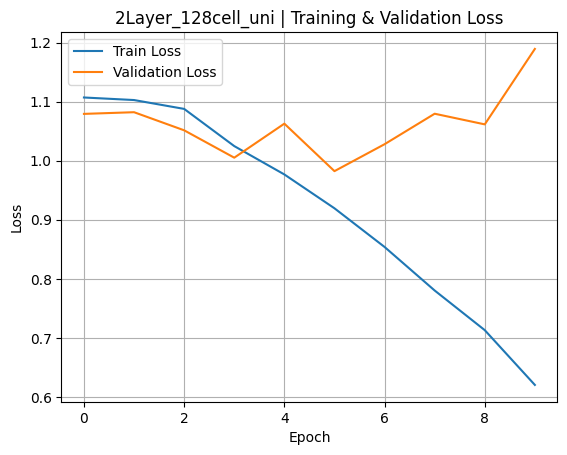


--- Training: 2Layer_128cell_bi ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_1 (Bidirectional)         │ (None, 250, 256)       │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_2 (Bidirectional)         │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,131 (2.01 MB)

 Trainable params: 528,131 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 4s - 920ms/step - accuracy: 0.3380 - loss: 1.1293 - val_accuracy: 0.4700 - val_loss: 1.0723
Epoch 2/10
4/4 - 1s - 299ms/step - accuracy: 0.4200 - loss: 1.0779 - val_accuracy: 0.4700 - val_loss: 1.0508
Epoch 3/10
4/4 - 1s - 320ms/step - accuracy: 0.4620 - loss: 1.0239 - val_accuracy: 0.4100 - val_loss: 1.0427
Epoch 4/10
4/4 - 1s - 330ms/step - accuracy: 0.5540 - loss: 0.9556 - val_accuracy: 0.5300 - val_loss: 1.0294
Epoch 5/10
4/4 - 1s - 301ms/step - accuracy: 0.5900 - loss: 0.9110 - val_accuracy: 0.5200 - val_loss: 1.0073
Epoch 6/10
4/4 - 1s - 297ms/step - accuracy: 0.6220 - loss: 0.8758 - val_accuracy: 0.4700 - val_loss: 0.9919
Epoch 7/10
4/4 - 1s - 334ms/step - accuracy: 0.6580 - loss: 0.8291 - val_accuracy: 0.5000 - val_loss: 0.9851
Epoch 8/10
4/4 - 1s - 305ms/step - accuracy: 0.6720 - loss: 0.7862 - val_accuracy: 0.5000 - val_loss: 0.9907
Epoch 9/10
4/4 - 1s - 307ms/step - accuracy: 0.6920 - loss: 0.7679 - val_accuracy: 0.5000 - val_loss: 0.9861
Epoch 10/10
4/4 - 1

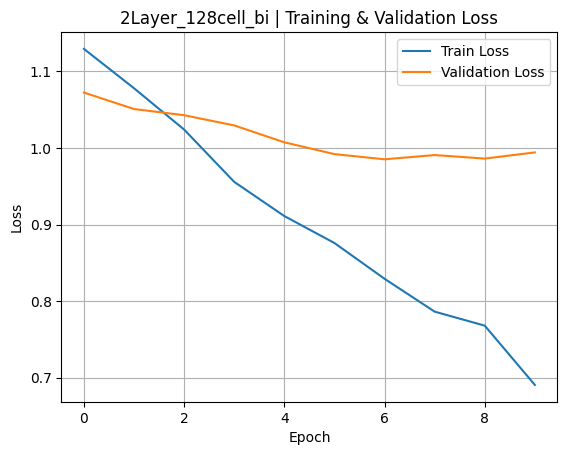

In [31]:
train_and_evaluate_all(VARIASI_ARAH_RNN, "Arah", dataset_dict)

### Perbandingan Bidirectional

In [32]:
def compare_scratch_keras_rnn():
    rnn = SimpleRNNModel(
        vocab_size=len(dataset_dict['vocab']),
        embedding_dim=EMBEDDING_DIM,
        rnn_unit=[128, 128],
        num_classes=3,
        sequence_length=dataset_dict['x_train'].shape[1],
        bidirectional=[True, True],
        w_dir="Models/SimpleRNN/training/weights"
    )
    rnn.build_model()
    
    rnn.load_weights("Arah/2Layer_128cell_bi.weights.h5")
    
    output_scratch = rnn.forward_scratch(dataset_dict['x_test'])
    output_keras = rnn.model.predict(dataset_dict['x_test'])
    
    # Scratch
    y_pred_scratch = np.argmax(output_scratch, axis=1)
    score_scratch = f1_score(dataset_dict['y_test'], y_pred_scratch, average='macro')
    
    # Keras
    y_pred_keras = np.argmax(output_keras, axis=1)
    score_keras = f1_score(dataset_dict['y_test'], y_pred_keras, average='macro')
    
    print(f"From Scratch | F1-Score: {score_scratch:.4f}")
    print(f"Keras | F1-Score: {score_keras:.4f}")

In [33]:
compare_scratch_keras_rnn()

/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_1 (Bidirectional)         │ (None, 250, 256)       │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_2 (Bidirectional)         │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,131 (2.01 MB)

 Trainable params: 528,131 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Bobot dimuat dari Models/SimpleRNN/training/weights/Arah/2Layer_128cell_bi.weights.h5


Forward Propagation: 100%|███████████████████| 400/400 [00:02<00:00, 171.53it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
From Scratch | F1-Score: 0.4732
Keras | F1-Score: 0.4732


### Perbandingan Unidirectional

In [34]:
def compare_scratch_keras_rnn_unidirectional():
    rnn = SimpleRNNModel(
        vocab_size=len(dataset_dict['vocab']),
        embedding_dim=EMBEDDING_DIM,
        rnn_unit=[128, 128],
        num_classes=3,
        sequence_length=dataset_dict['x_train'].shape[1],
        bidirectional=[False, False],
        w_dir="Models/SimpleRNN/training/weights"
    )
    rnn.build_model()
    rnn.load_weights("Arah/2Layer_128cell_uni.weights.h5") 
    
    output_scratch = rnn.forward_scratch(dataset_dict['x_test'])
    output_keras = rnn.model.predict(dataset_dict['x_test'])
    
    y_pred_scratch = np.argmax(output_scratch, axis=1)
    score_scratch = f1_score(dataset_dict['y_test'], y_pred_scratch, average='macro')
    
    y_pred_keras = np.argmax(output_keras, axis=1)
    score_keras = f1_score(dataset_dict['y_test'], y_pred_keras, average='macro')
    
    print(f"Unidirectional - From Scratch | F1-Score: {score_scratch:.4f}")
    print(f"Unidirectional - Keras | F1-Score: {score_keras:.4f}")

In [35]:
compare_scratch_keras_rnn_unidirectional()

/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,187 (1.64 MB)

 Trainable params: 429,187 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Bobot dimuat dari Models/SimpleRNN/training/weights/Arah/2Layer_128cell_uni.weights.h5


Forward Propagation: 100%|███████████████████| 400/400 [00:01<00:00, 358.49it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Unidirectional - From Scratch | F1-Score: 0.4411
Unidirectional - Keras | F1-Score: 0.4411
